# 1. Getting started with GEMs and FBA

## Authors
* Arianna Basile, MRC Toxicology Unit, University of Cambridge
* Francisco Zorrilla, MRC Toxicology Unit, University of Cambridge

## Learning outcomes

In this tutorial you will use [cobrapy](https://cobrapy.readthedocs.io/en/latest/) to learn the following:

* **1.1**: Import a metabolic reconstruction
* **1.2**: Inspect the reactions of your model
* **1.3**: Inspect the metabolites in your model
* **1.4**: Inspect the genes in your model
* **1.4.1**: Perform in-silico gene knockout experiments

## Setup

In [1]:
# Import required packages
import cobra

# Enable autocompleting with tab key
%config Completer.use_jedi = False

## 1.1 Import a reconstruction

The [Systems Biology Markup Language](https://sbml.org/) is an XML-based standard format for distributing models which has support for COBRA models through the FBC extension version 2.

Cobrapy has native support for reading and writing SBML with FBCv2. Please note that all id’s in the model must conform to the SBML SID requirements in order to generate a valid SBML file.

Let's download and import the model of <a href="http://bigg.ucsd.edu/search?query=Saccharomyces+cerevisiae+S288C"> Saccharomyces cerevisiae</a>.

In [2]:
model_yeast=cobra.io.read_sbml_model("iMM904.xml.gz")

The reactions, metabolites, genes, and compartments attributes of the cobrapy model are a special type of `list` called a `cobra.DictList`, and each one is made up of `cobra.Reaction`, `cobra.Metabolite`, `cobra.Gene`, `cobra.Compartment` objects, respectively.

In [3]:
print("Reactions: ",len(model_yeast.reactions))
print("Metabolites: ",len(model_yeast.metabolites))
print("Genes: ",len(model_yeast.genes))
print("Compartments: ",len(model_yeast.compartments))

Reactions:  1577
Metabolites:  1226
Genes:  905
Compartments:  8


When using Jupyter notebooks, this type of information is rendered as a table.

In [4]:
model_yeast

Name,iMM904
Memory address,0x07feff150e670
Number of metabolites,1226
Number of reactions,1577
Number of groups,0
Objective expression,1.0*BIOMASS_SC5_notrace - 1.0*BIOMASS_SC5_notrace_reverse_93090
Compartments,"cytosol, extracellular space, mitochondria, peroxisome/glyoxysome, endoplasmic reticulum, vacuole, golgi apparatus, nucleus"


Just like a regular list, objects in the `DictList` can be retrieved by index. For example, to get the 3rd reaction in the model (at index 2nd because of 0-indexing):

In [5]:
model_yeast.reactions[2]

Reaction identifier,13BGHe
Name,Exo 1 3 beta glucan glucohydrase
Memory address,0x07feff1985850
Stoichiometry,13BDglcn_e + h2o_e --> glc__D_e 1 3 beta D Glucan C6H10O5 + H2O H2O --> D-Glucose
GPR,YOR190W or YDR261C or YLR300W
Lower bound,0.0
Upper bound,999999.0


Additionally, items can be retrieved by their id using the `DictList.get_by_id()` function. For example, to get the cytosolic atp metabolite object (the id is `atp_c`), we will inspect metabolites in the section 1.3
For the moment, we can focus on the reactions of our model. 

## 1.2 Reactions

We will consider the reaction glucose 6-phosphate isomerase, which interconverts glucose 6-phosphate and fructose 6-phosphate. The reaction id for this reaction in our test model is PGI. However, if you want to see the IDs of the first `N` number of reactions in the reconstruction, you can run the code below:

In [6]:
reaction_ids = [reaction.id for reaction in model_yeast.reactions]
N=20
reaction_ids[:N]

['CITtcp',
 '13BGH',
 '13BGHe',
 '13GS',
 '16GS',
 '23CAPPD',
 '2DDA7Ptm',
 '2DHPtm',
 '2DOXG6PP',
 '2HBO',
 '2HBt2',
 '2HMHMBQMTm',
 '2HP6MPMOm',
 '2HPMBQMTm',
 '2HPMMBQMOm',
 '2MBACt',
 'EX_epistest_SC_e',
 'EX_epist_e',
 '2MBALDt',
 '2MBALDtm']

Now, let's focus on PGI or another reaction of your choice:

In [7]:
pgi = model_yeast.reactions.get_by_id("PGI")
pgi

Reaction identifier,PGI
Name,Glucose-6-phosphate isomerase
Memory address,0x07fefe0ac4be0
Stoichiometry,g6p_c <=> f6p_c D-Glucose 6-phosphate <=> D-Fructose 6-phosphate
GPR,YBR196C
Lower bound,-999999.0
Upper bound,999999.0


We can view the full name and reaction catalyzed as strings.

In [8]:
print(pgi.name)
print(pgi.reaction)

Glucose-6-phosphate isomerase
g6p_c <=> f6p_c


We can also view reaction upper and lower bounds, large numbers, typically around 1000 or more, are used as infinite limits (unconstrained fluxes). 
Because the `pgi.lower_bound` < 0, and `pgi.upper_bound` > 0, pgi is reversible.

In [9]:
print(pgi.lower_bound, "< pgi <", pgi.upper_bound)
print(pgi.reversibility)

-999999.0 < pgi < 999999.0
True


The lower and upper bound of reactions can also be modified, and the reversibility attribute will automatically be updated. The preferred method for manipulating bounds is using reaction.bounds, e.g.

In [10]:
# Save original bounds
old_bounds = pgi.bounds

# Define and print new bounds
pgi.bounds = (0, 1000.0)
print("New bounds: ",pgi.lower_bound, "< pgi <", pgi.upper_bound)
print("Reversibility after modification:", pgi.reversibility)

# Reset bounds and show reversibility
pgi.bounds = old_bounds
print("Reversibility after resetting:", pgi.reversibility)

New bounds:  0 < pgi < 1000.0
Reversibility after modification: False
Reversibility after resetting: True


We can also ensure the reaction is mass balanced. This function will return elements which violate mass balance. If it comes back empty, then the reaction is mass balanced.

In [11]:
pgi.check_mass_balance()

{}

In order to add a metabolite, we pass in a dictionary with the metabolite object and its coefficient

In [12]:
pgi.add_metabolites({model_yeast.metabolites.get_by_id("h_c"): -1})
pgi.reaction

'g6p_c + h_c <=> f6p_c'

The reaction is no longer mass balanced

In [13]:
pgi.check_mass_balance()

{'charge': -1.0, 'H': -1.0}

We can remove the metabolite, and the reaction will be balanced once again.



In [14]:
pgi.subtract_metabolites({model_yeast.metabolites.get_by_id("h_c"): -1})
print(pgi.reaction)
print(pgi.check_mass_balance())

g6p_c <=> f6p_c
{}


## 1.3 Metabolites

We will consider cytosolic atp as our metabolite, which has the id `atp_c` in our test model. However, if you want to see the IDs of the first N metabolites in the reconstruction, you can run the code below:

In [15]:
metabolite_ids = [metabolite.id for metabolite in model_yeast.metabolites]
N=20
metabolite_ids[:N]

['2dr5p_c',
 '2hb_c',
 '2hb_e',
 '2hhxdal_c',
 '2hp6mbq_m',
 '2hp6mp_m',
 '2hpmhmbq_m',
 '2hpmmbq_m',
 '2ippm_c',
 '2kmb_c',
 '2mahmp_c',
 '2mbac_c',
 '2mbac_e',
 '2mbald_c',
 '2mbald_e',
 '2mbald_m',
 '2mbtoh_c',
 '2mbtoh_e',
 '2mbtoh_m',
 '2mcit_m']

Now, let's focus on `atp_c` or another metabolite of your choice:

In [16]:
atp = model_yeast.metabolites.get_by_id("atp_c")
atp

Metabolite identifier,atp_c
Name,ATP C10H12N5O13P3
Memory address,0x07feff161bf10
Formula,C10H12N5O13P3
Compartment,c
In 149 reaction(s),"PNTK, NDPK7, PC, AASAD1, ASPTRS, METAT, NMNAT, FACOAL181, PFK_3, ATPPRT, HSK, PRPPS, ADNK1, ATPtm_H, INSK, ETHAK, PRAIS, LEUTRS, GMPS2, RNTR1, NNATr, RBFK, SLCBK1, DGK1, ARGSS, GLUK, PFK, NDPK1,..."


We can print out the metabolite name and compartment (cytosol in this case) directly as string.



In [17]:
print(atp.name)
print(atp.compartment)

ATP C10H12N5O13P3
c


We can see that ATP is a charged molecule in our model.



In [18]:
atp.charge

-4

We can see the chemical formula for the metabolite as well.



In [19]:
print(atp.formula)

C10H12N5O13P3


## 1.4 Genes

The `gene_reaction_rule` is a boolean representation of the gene requirements for this reaction to be active as described in <a href="https://www.nature.com/articles/nprot.2011.308">Schellenberger et al 2011 Nature Protocols 6(9):1290-307</a>.

The gene-protein-reaction rules (GPR) are stored as `GPR class` in the GPR field of a reaction object. A string representation can be extracted using `gene_reaction_rule` on a Reaction object.

In [20]:
gpr_string = pgi.gene_reaction_rule
print(gpr_string)

YBR196C


Corresponding gene objects also exist. These objects are tracked by the reactions itself, as well as by the model

In [21]:
pgi_gene = model_yeast.genes.get_by_id("YBR196C")
pgi_gene

Gene identifier,YBR196C
Name,PGI1
Memory address,0x07feff18d3c10
Functional,True
In 3 reaction(s),"G6PI3, G6PI, PGI"


To check that this gene is also on KEGG database to assess the consistency of the metabolic reconstruction, click <a href="https://www.genome.jp/entry/sce:YBR196C"> here</a>. 

### 1.4.1 Simulating Knockouts

The `delete_model_genes` function will evaluate the GPR and set the upper and lower bounds to 0 if the reaction is knocked out.

In [22]:
model_yeast=cobra.io.read_sbml_model("iMM904.xml.gz")
pgi=model_yeast.reactions.get_by_id("PGI")
print("before KO: %4d < flux_PGI < %4d" % (pgi.lower_bound, pgi.upper_bound))


gene=model_yeast.genes.get_by_id("YBR196C")
gene.knock_out()
print("after KO: %4d < flux_PGI < %4d" % (pgi.lower_bound, pgi.upper_bound))


before KO: -999999 < flux_PGI < 999999
after KO:    0 < flux_PGI <    0


One may often want to make small changes to a model and evaluate their impacts. For example, we may want to knock-out all reactions sequentially, and see what the impact of this is on the objective function. One way of doing this would be to create a new copy of the model before each knock-out with the `model.copy()` function. However, even with small models, this is a very slow approach as models are quite complex objects. Instead, it is better to carry out the knock-out, optimize (i.e. solve FBA problem), and then manually reset the reaction bounds before proceeding with the next reaction. Since this is such a common scenario, `cobrapy` allows us to use the model as a context, to have changes reverted automatically.

Here we knock out the first N reactions and check for new growth rate values:

In [23]:
# Import the model again to reverse the previous edits
model_yeast=cobra.io.read_sbml_model("iMM904.xml.gz")

# Show FBA solution growth rate prior to reaction knockouts
model_yeast.optimize()
print("Pre reaction knockout growth rate: ",model_yeast.objective.value)

# Define first N number of reactions to knock out
N=20

# Simulate knockouts of N single reactions 
for reaction in model_yeast.reactions[:N]:
    with model_yeast as model_yeast:  # Prevent editing of the original model
        reaction.knock_out()
        model_yeast.optimize()
        print('%s blocked (bounds: %s), new growth rate %f' %
              (reaction.id, str(reaction.bounds), model_yeast.objective.value))

Pre reaction knockout growth rate:  0.28786570370401793
CITtcp blocked (bounds: (0, 0)), new growth rate 0.287866
13BGH blocked (bounds: (0, 0)), new growth rate 0.287866
13BGHe blocked (bounds: (0, 0)), new growth rate 0.287866
13GS blocked (bounds: (0, 0)), new growth rate 0.000000
16GS blocked (bounds: (0, 0)), new growth rate 0.287866
23CAPPD blocked (bounds: (0, 0)), new growth rate 0.287866
2DDA7Ptm blocked (bounds: (0, 0)), new growth rate 0.287866
2DHPtm blocked (bounds: (0, 0)), new growth rate 0.287866
2DOXG6PP blocked (bounds: (0, 0)), new growth rate 0.287866
2HBO blocked (bounds: (0, 0)), new growth rate 0.287866
2HBt2 blocked (bounds: (0, 0)), new growth rate 0.287866
2HMHMBQMTm blocked (bounds: (0, 0)), new growth rate 0.287866
2HP6MPMOm blocked (bounds: (0, 0)), new growth rate 0.287866
2HPMBQMTm blocked (bounds: (0, 0)), new growth rate 0.287866
2HPMMBQMOm blocked (bounds: (0, 0)), new growth rate 0.287866
2MBACt blocked (bounds: (0, 0)), new growth rate 0.287866
EX_ep

Next we will knock out genes instead of reactions.

In [24]:
# Import the model again to reverse the previous edits
model_yeast=cobra.io.read_sbml_model("iMM904.xml.gz")

# Show FBA solution growth rate prior to gene knockouts
model_yeast.optimize()
print("Pre gene knockout growth rate: ",model_yeast.objective.value)

# Define first N number of genes to knock out
N=20

# Simulate knockouts of N genes and print values
for gene in model_yeast.genes[:N]:
    with model_yeast as model_yeast:  # Prevent editing the original model
        gene.knock_out()
        model_yeast.optimize()
        print('%s, new growth rate %f' %
              (gene.id, model_yeast.objective.value))
        

# Simulate gene knockouts for all genes, this time we are storing the results in a vector for plotting
genes_ids=[gene.id for gene in model_yeast.genes]
grow_rates=[]
for gene in model_yeast.genes:
    with model_yeast as model_yeast:  # Prevent editing the original model
        gene.knock_out()
        model_yeast.optimize()
        grow_rates.append(model_yeast.objective.value)

Pre gene knockout growth rate:  0.28786570370401793
YHR104W, new growth rate 0.287866
YDR368W, new growth rate 0.287866
YGR282C, new growth rate 0.287866
YOL086C, new growth rate 0.287866
YLR300W, new growth rate 0.287866
YFR055W, new growth rate 0.287866
YGL184C, new growth rate 0.287866
YDR261C, new growth rate 0.287866
YDL168W, new growth rate 0.287866
YOR190W, new growth rate 0.287866
YOL030W, new growth rate 0.287866
YLR343W, new growth rate 0.287866
YNL247W, new growth rate 0.287866
YMR303C, new growth rate 0.287866
YGR155W, new growth rate 0.287843
YGR032W, new growth rate 0.287866
YOL132W, new growth rate 0.287866
YGL256W, new growth rate 0.287866
YBR145W, new growth rate 0.287866
YCR034W, new growth rate -0.000000


Let's see the distribution of our results creating a histogram plot with the vectors obtained above:

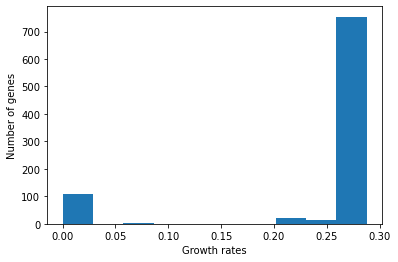

In [25]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(genes_ids)
y = np.array(grow_rates)

plt.hist(y)
plt.xlabel('Growth rates')
plt.ylabel('Number of genes')
plt.savefig("distribution.png", dpi=100, bbox_inches='tight',pad_inches=0)

Let's try a different visualization, this time we will create a big scatter plot showing the growth rate of each gene-knockout.

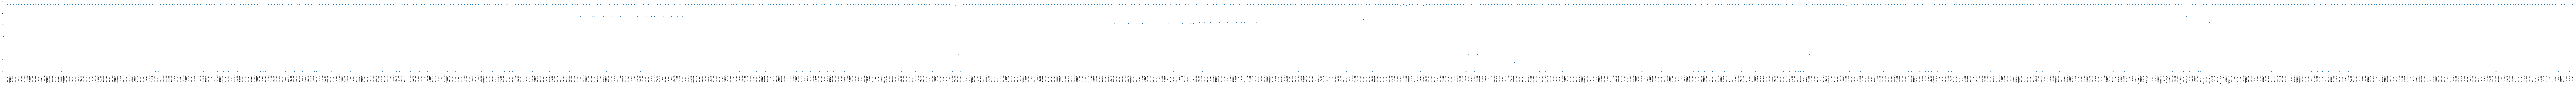

In [26]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(genes_ids)
y = np.array(grow_rates)

fig = plt.figure(figsize=(340, 10))
plt.scatter(x, y)
plt.margins(x=0.001) 
plt.xticks(rotation=90)
plt.savefig("scatter.png", dpi=100, bbox_inches='tight',pad_inches=0)

Since the generate plot is very wide, it will appear as a blank box. Double click on it to expand it, then you can scroll to the right to inspect gene-knockout-induced changes in growth rate.

### Questions

1. The distribution of predicted growth rates appears to be bimodal, with a small peak on the left and a larger peak on the right, can you explain why it has this shape? 
2. Can you verify the consistency between gene and reactions knockouts results using a gene or a reaction of your choice?
3. Can you verify the essentiality of your gene of choice from the previous exercise using relevant databases (e.g. KEGG and the SGD)?
4. Do you expect these results to change if we change the medium where we are growing our yeast model? 

### Solutions 
#### Question 1

Answer here

#### Question 2

In [27]:
# Code here

In [28]:
# Code here

#### Question 3

Answer here

#### Question 4

Answer here